In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Project 2 (P170) -- Hotel Rating Classification\\hotel_reviews.xlsx')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.shape

(20491, 2)

In [5]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<AxesSubplot:>

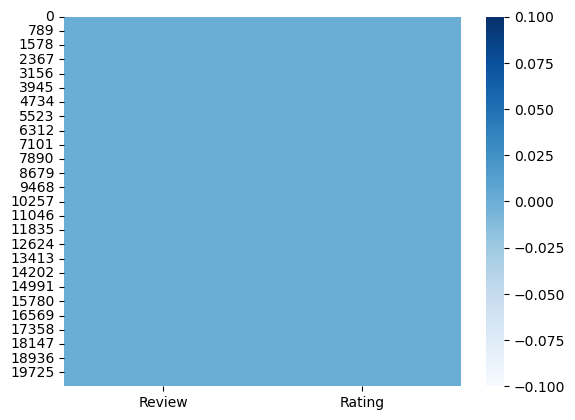

In [6]:
sns.heatmap(df.isnull(),cmap="Blues")

In [7]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [10]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

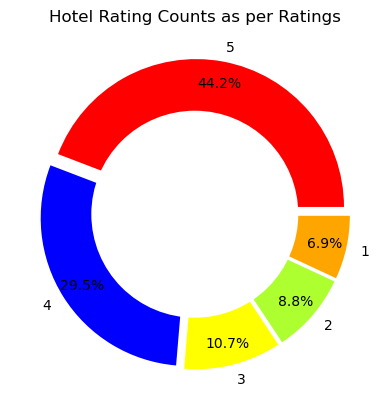

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Rating = ['5', '4', '3',
            '2', '1']
  
# Setting size in Chart based on 
# given values
No_Rating = [9054, 6039, 2184, 1793, 1421]
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(No_Rating, colors=colors, labels=Rating,autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Hotel Rating Counts as per Ratings')
  
# Displaying Chart
plt.show()

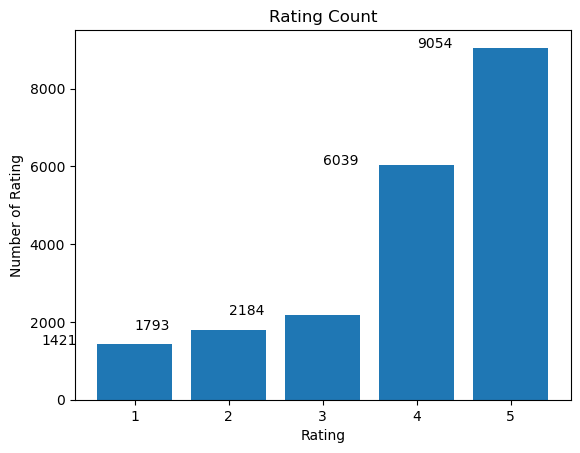

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    x=[1,2,3,4,5]
    y=[1421,1793,2184,6039,9054]
      
  
    plt.bar(x, y)
      
 
    addlabels(x, y)
      
   
    plt.title("Rating Count")
      
    
    plt.xlabel("Rating")
    plt.ylabel("Number of Rating")
      

    plt.show()

In [13]:
df['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

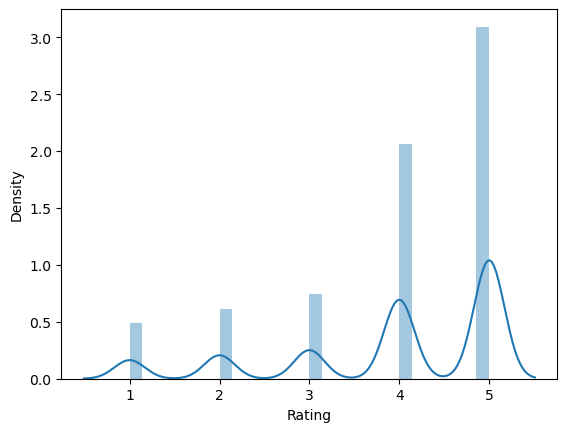

In [14]:
sns.distplot(df['Rating'])

# Data Cleaning 

In [15]:
# Regular Expression 

In [16]:
import re
import string

In [17]:
# Defining a function which makes all text to lowercas,removes brackets, punctuation and numbers

In [18]:

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[0-9]" "]+'," ",text)
    text = re.sub('[''""..]','',text)
    return text

clean = lambda x:clean_text(x)
    

In [19]:
df['Review']= df.Review.apply(clean)

In [20]:
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not experience hotel monaco seattl...,3


In [21]:
# Word Frequency 

In [22]:
# pip install wordcloud
from wordcloud import WordCloud

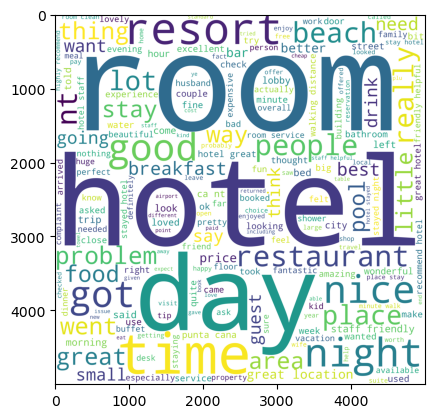

In [23]:
string_total =  ' '.join(df['Review'])
wordcould_stw = WordCloud(background_color = 'white',width = 5000,height = 5000).generate(string_total)
plt.imshow(wordcould_stw)

In [24]:
frequency = pd.Series(' '.join(df['Review']).split()).value_counts()[:20]

In [25]:
frequency

hotel       48832
room        34300
not         31525
great       21087
nt          18989
good        16972
staff       16203
stay        15153
did         13892
just        12589
nice        12399
rooms       12015
no          11603
location    11032
stayed      10466
service      9961
time         9816
beach        9581
night        9423
clean        9359
dtype: int64

<AxesSubplot:>

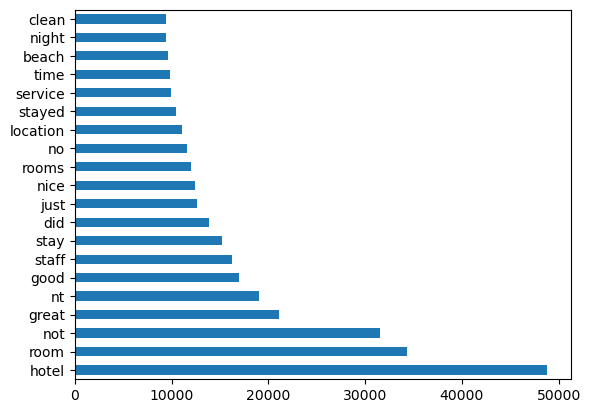

In [26]:
frequency.plot(kind='barh')

In [27]:
# Removal of STOP WORDS

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [31]:
# Word Frequency after removal of STOP WORDS

In [32]:
frequency2 = pd.Series(' '.join(df['Review']).split()).value_counts()[:20]


In [33]:
frequency2

hotel        48832
room         34300
great        21087
nt           18989
good         16972
staff        16203
stay         15153
nice         12399
rooms        12015
location     11032
stayed       10466
service       9961
time          9816
beach         9581
night         9423
clean         9359
day           9340
breakfast     9271
food          8990
like          8112
dtype: int64

<AxesSubplot:>

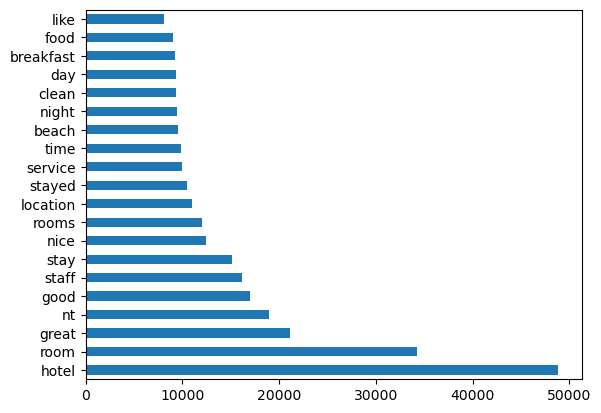

In [34]:
frequency2.plot(kind='barh')

In [35]:
frequency2

hotel        48832
room         34300
great        21087
nt           18989
good         16972
staff        16203
stay         15153
nice         12399
rooms        12015
location     11032
stayed       10466
service       9961
time          9816
beach         9581
night         9423
clean         9359
day           9340
breakfast     9271
food          8990
like          8112
dtype: int64

In [36]:
# Count Vectoriser

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

In [38]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X=vectorizer.fit_transform(df['Review'])

In [39]:
word_freq_df = pd.DataFrame({'Term':vectorizer.get_feature_names(),'Occurances' : np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['Frequency'] = word_freq_df['Occurances']/np.sum(word_freq_df['Occurances'])


C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
word_freq_df.head(20).sort_values(by='Frequency', ascending=False)

,Term,Occurances,Frequency
1,aaa,60,3.001537e-05
0,aa,13,6.503330e-06
13,aalders,8,4.002049e-06
17,aarp,3,1.500768e-06
16,aaron,3,1.500768e-06
19,aas,2,1.000512e-06
6,aaaare,1,5.002561e-07
7,aaah,1,5.002561e-07
8,aaahhh,1,5.002561e-07
9,aadvantage,1,5.002561e-07


In [41]:
# TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Top 500 Words

In [44]:
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 500,max_df =0.5,smooth_idf = True)
doc_vec = vectorizer.fit_transform(df['Review'])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()


C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
df2 = pd.DataFrame(denselist,columns =names_features )

In [46]:
df2

,able,absolutely,access,activities,actually,afternoon,air,airport,amazing,amenities,...,worked,working,world,worst,worth,wrong,year,years,yes,york
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.095207,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.195339,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
4,0.0,0.000000,0.0,0.107348,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.102409,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20487,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20488,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20489,0.0,0.073794,0.0,0.000000,0.037284,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.125307,0.0,0.0,0.0,0.000000,0.105892,0.0,0.00000,0.0


# N-Gram - Words Combination Identification

In [47]:
# Bi-gram

In [48]:
def top_n2_words (corpus ,n=None):
    vec1 = CountVectorizer(ngram_range =(2,2), max_features = 500).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq [:n]    

In [49]:
top2_words_combo = top_n2_words(df['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,great location,2139
1,staff friendly,2077
2,ca nt,1809
3,punta cana,1682
4,hotel great,1465


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'great location'),
 Text(1, 0, 'staff friendly'),
 Text(2, 0, 'ca nt'),
 Text(3, 0, 'punta cana'),
 Text(4, 0, 'hotel great'),
 Text(5, 0, 'great hotel'),
 Text(6, 0, 'walking distance'),
 Text(7, 0, 'recommend hotel'),
 Text(8, 0, 'friendly helpful'),
 Text(9, 0, 'hotel staff'),
 Text(10, 0, 'stayed hotel'),
 Text(11, 0, 'room service'),
 Text(12, 0, 'stay hotel'),
 Text(13, 0, 'highly recommend'),
 Text(14, 0, 'room clean'),
 Text(15, 0, 'staff helpful'),
 Text(16, 0, 'place stay'),
 Text(17, 0, 'minute walk'),
 Text(18, 0, 'stayed nights'),
 Text(19, 0, 'hotel stayed')]

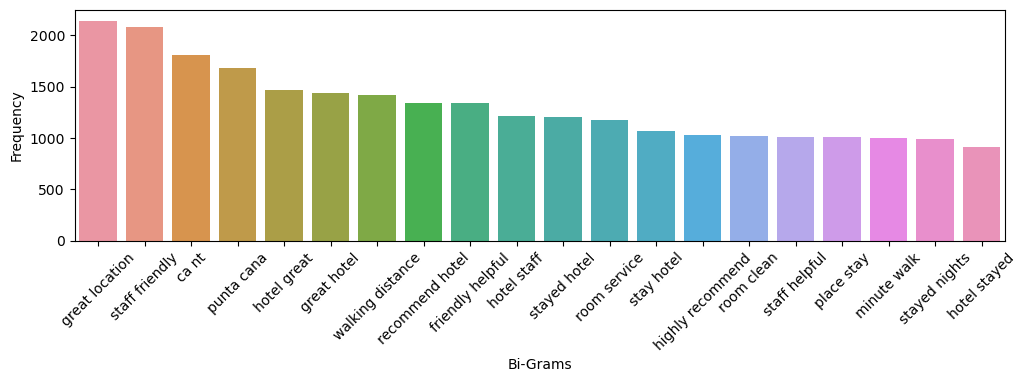

In [51]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])


In [52]:
# Tri-gram

In [53]:
def top_n3_words (corpus ,n=None):
    vec1 = CountVectorizer(ngram_range =(3,3), max_features = 500).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq [:n]    

In [54]:
top3_words_combo = top_n3_words(df['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,staff friendly helpful,700
1,hotel great location,541
2,old san juan,354
3,highly recommend hotel,313
4,great place stay,273


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'hotel great location'),
 Text(2, 0, 'old san juan'),
 Text(3, 0, 'highly recommend hotel'),
 Text(4, 0, 'great place stay'),
 Text(5, 0, 'ca nt wait'),
 Text(6, 0, 'king size bed'),
 Text(7, 0, 'flat screen tv'),
 Text(8, 0, 'great hotel great'),
 Text(9, 0, 'good value money'),
 Text(10, 0, 'stayed hotel nights'),
 Text(11, 0, 'hotel staff friendly'),
 Text(12, 0, 'easy walking distance'),
 Text(13, 0, 'free internet access'),
 Text(14, 0, 'ca nt beat'),
 Text(15, 0, 'hotel good location'),
 Text(16, 0, 'la carte restaurants'),
 Text(17, 0, 'staff helpful friendly'),
 Text(18, 0, 'ca nt say'),
 Text(19, 0, 'returned night stay')]

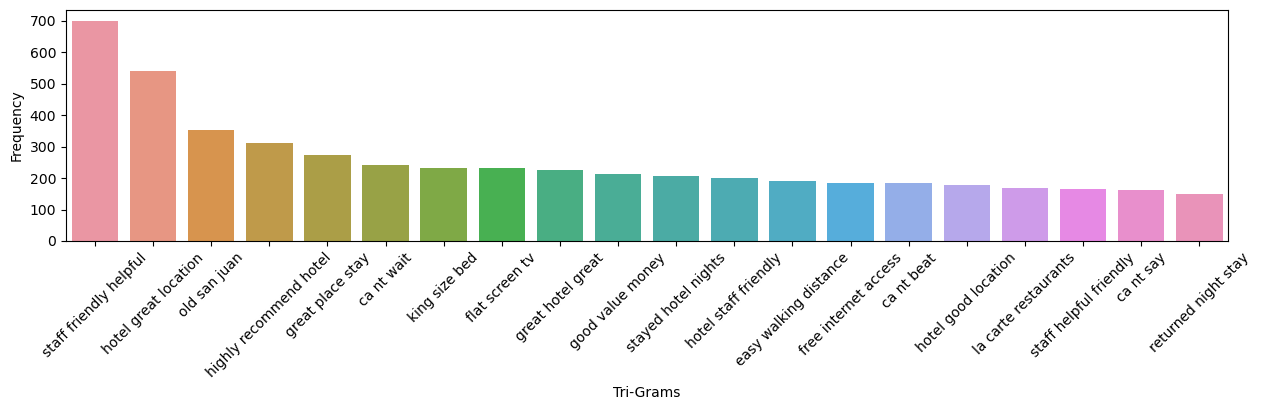

In [55]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

In [56]:
# Auto EDA Using Pandas Profiling and Sweetix

In [57]:
#!pip install sweetviz
import sweetviz as sv

In [58]:
sweet_report = sv.analyze(df)
sweet_report.show_html('Hotel Rating Classification_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Hotel Rating Classification_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Building

# Naive Bayes classification 


# Using Bag Of Words

In [59]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms experience hotel monaco seattle goo...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [60]:
# function to split 

def split_into_words(i):
    return(i.split(' '))

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
email_train,email_test = train_test_split(df, test_size = 0.25)

In [63]:
email_train

,Review,Rating
6688,nt ok wish read reviews booked vacation got ho...,1
3869,nice beach shabby hotel poor service basically...,2
14468,lovely hotel antiche figure marvelous small ho...,4
18802,hated honesty tell people expect star service ...,2
12062,loved boyfriend fantastic night hotel staff fr...,4
...,...,...
4480,good ended poorly stayed nights conveniently l...,3
16355,nice chairs single rooms small clean welldesig...,3
12484,solo arrived late night check problem got room...,2
5489,fantastic returned night city break friends ab...,5


In [64]:
emails_bow = CountVectorizer(analyzer = split_into_words).fit(df['Review'])

In [65]:
all_emails_matrix = emails_bow.transform(df['Review'])

In [66]:
all_emails_matrix.shape

(20491, 75173)

In [67]:
train_emails_matrix = emails_bow.transform(email_train['Review'])

In [68]:
train_emails_matrix.shape

(15368, 75173)

In [69]:
test_emails_matrix = emails_bow.transform(email_test['Review'])

In [70]:
test_emails_matrix.shape

(5123, 75173)

In [71]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [72]:
# Multinomial Naive Bayes

In [73]:
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.Rating)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.Rating)
print('Train Accuracy =',round(accuracy_train_m *100))

Train Accuracy = 75


In [74]:
test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.Rating)
print('Test Accuracy =',round(accuracy_test_m *100))

Test Accuracy = 56


In [75]:
# Gaussian Naive Bayes

In [76]:
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.Rating.values)


GaussianNB()

In [77]:
train_pred_g =  classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g == email_train.Rating)

In [78]:
'Train Accuracy =', round(accuracy_train_g*100)

('Test Accuracy =', 85)

In [79]:
test_pred_g =  classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g == email_test.Rating)

In [80]:
'Test Accuracy' accuracy_test_g 

0.30724185047823543

# Using TFIDF

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

In [82]:
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

In [83]:
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

In [84]:
train_tfidf.shape

(15368, 75173)

In [85]:
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

In [86]:
test_tfidf.shape

(5123, 75173)

In [87]:
# Multinomial Naive Bayes

In [88]:
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.Rating)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.Rating)
print('Train Accuracy =',round(accuracy_train_m *100))

Train Accuracy = 45


In [89]:
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.Rating)
print('Test Accuracy =',round(accuracy_test_m *100))

Test Accuracy = 45


In [90]:
# Gaussian Naive Bayes

In [91]:
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.Rating.values)

GaussianNB()

In [92]:
train_pred_g =  classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g == email_train.Rating)

In [93]:
'Test Accuracy =', round(accuracy_train_g*100)

('Test Accuracy =', 86)

In [94]:
test_pred_g =  classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g == email_test.Rating)

In [95]:
accuracy_test_g 

0.31700175678313486

In [96]:
train_tfidf

<15368x75173 sparse matrix of type '<class 'numpy.float64'>'
	with 1213355 stored elements in Compressed Sparse Row format>

# EMOTION MINING

In [97]:
afinn = pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Project 2 (P170) -- Hotel Rating Classification\\Afinn.csv',sep = ',',encoding = 'latin-1')

In [98]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [99]:
afinn.shape

(2477, 2)

In [100]:
# pip install spacy 

In [101]:
import numpy as np 
import pandas as pd
import string
import spacy
import matplotlib.pyplot as plt 

In [102]:
dfr = df.iloc[:,[0]]

In [103]:
dfr

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms experience hotel monaco seattle goo...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
20486,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...
20488,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...


In [104]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
from nltk import tokenize

In [106]:
dfr

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms experience hotel monaco seattle goo...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
20486,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...
20488,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...


In [107]:
affinity_score = afinn.set_index('word')['value'].to_dict()

In [108]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [109]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

In [110]:
def calculate_sentiment(text: str =None):
    sent_score = 0
    if text:
        sentence =nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [111]:
calculate_sentiment(text ='amazing')

4

In [112]:
dfr['sentiment_value'] = dfr['Review'].apply(calculate_sentiment)

In [113]:
dfr

,Review,sentiment_value
0,nice hotel expensive parking got good deal sta...,26
1,ok nothing special charge diamond member hilto...,38
2,nice rooms experience hotel monaco seattle goo...,24
3,unique great stay wonderful time hotel monaco ...,39
4,great stay great stay went seahawk game awesom...,36
...,...,...
20486,best kept secret time staying charm ca nt beat...,16
20487,great location price view hotel great quick pl...,19
20488,ok looks nice modern outside desk staff nt par...,7
20489,hotel theft ruined vacation hotel opened sept ...,-3


In [114]:
dfr['sentiment_value'].describe()

count    20491.000000
mean        20.388463
std         17.866043
min        -39.000000
25%         10.000000
50%         18.000000
75%         27.000000
max        296.000000
Name: sentiment_value, dtype: float64

In [118]:
dfr[dfr['sentiment_value']<=0].head(10)

,Review,sentiment_value
42,warwick bad good reviews warwick shocks staff ...,-5
44,austin powers decor familiar hotel seattlewher...,-6
65,hated inn terrible roomservice horrible staff ...,-14
76,stay clear internet reservation friday rang ho...,-11
88,worst hotel experience booked nonsmoking room ...,-12
97,terrible hotel approximately weeks ago april r...,-4
99,old dumpy place problems head starts spinning ...,-4
118,luxury luxury stayed suite elses dime suite ki...,0
135,funky boutique hotel different plain ac small ...,-1
140,rudest people dont stay despite fact cool hote...,-4


In [117]:
dfr[dfr['sentiment_value']>=20].head(10)

,Review,sentiment_value
0,nice hotel expensive parking got good deal sta...,26
1,ok nothing special charge diamond member hilto...,38
2,nice rooms experience hotel monaco seattle goo...,24
3,unique great stay wonderful time hotel monaco ...,39
4,great stay great stay went seahawk game awesom...,36
6,cozy stay rainy city husband spent nights mona...,28
12,nice hotel good location hotel kimpton design ...,31
16,disappointed say anticipating stay hotel monac...,41
17,fantastic stay monaco seattle hotel monaco hol...,31
19,hmmmmm say really high hopes hotel monaco chos...,27


In [119]:
dfr['Index']=range(0,len(dfr))

In [121]:
dfr

,Review,sentiment_value,Index
0,nice hotel expensive parking got good deal sta...,26,0
1,ok nothing special charge diamond member hilto...,38,1
2,nice rooms experience hotel monaco seattle goo...,24,2
3,unique great stay wonderful time hotel monaco ...,39,3
4,great stay great stay went seahawk game awesom...,36,4
...,...,...,...
20486,best kept secret time staying charm ca nt beat...,16,20486
20487,great location price view hotel great quick pl...,19,20487
20488,ok looks nice modern outside desk staff nt par...,7,20488
20489,hotel theft ruined vacation hotel opened sept ...,-3,20489


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

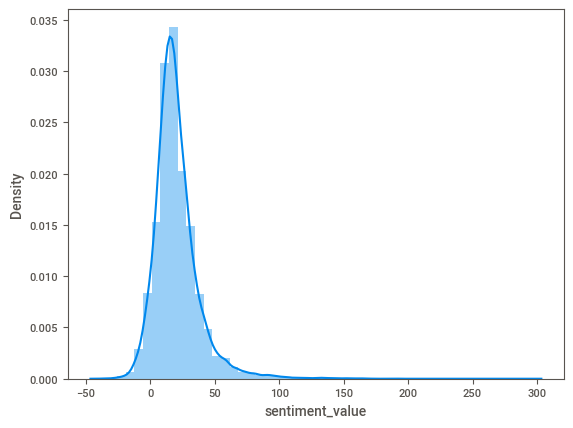

In [125]:
sns.distplot(dfr['sentiment_value'])

<AxesSubplot:xlabel='Index', ylabel='sentiment_value'>

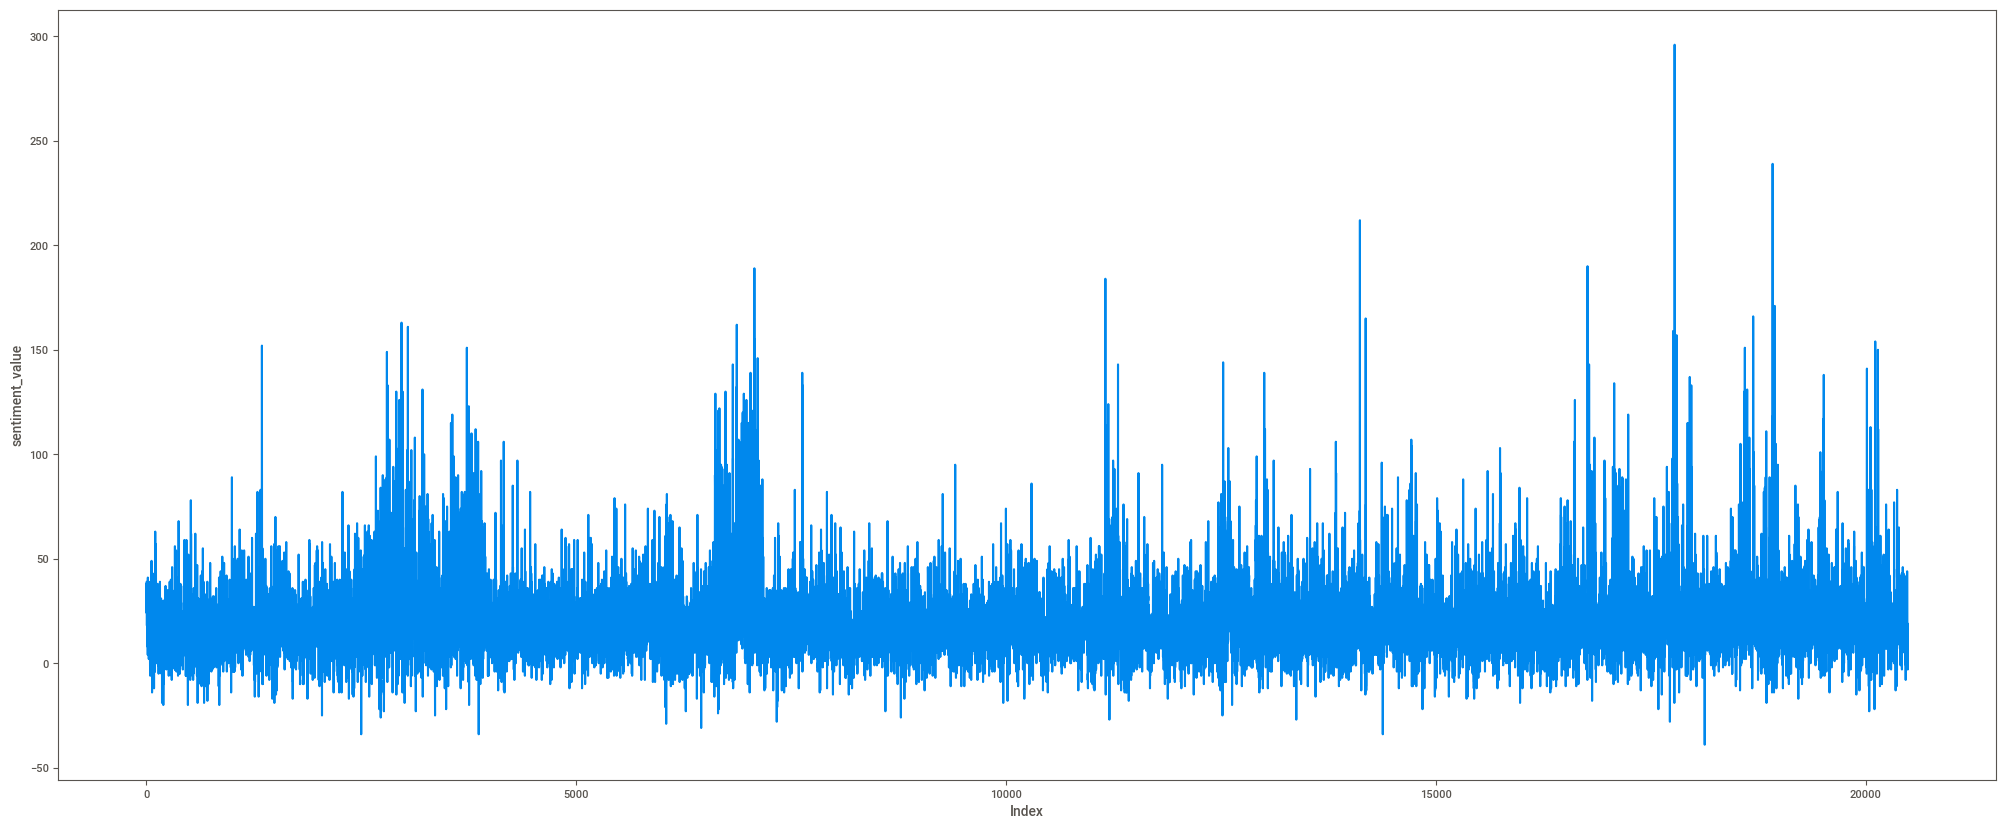

In [134]:
plt.figure(figsize=(25,10))
sns.lineplot(x='Index',y='sentiment_value',data = dfr)

In [140]:
dfr['word_count'] = dfr['Review'].str.split().apply(len)
dfr['word_count'].head(10)

0     80
1    228
2    195
3     85
4    178
5    128
6     96
7     83
8     58
9     33
Name: word_count, dtype: int64

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

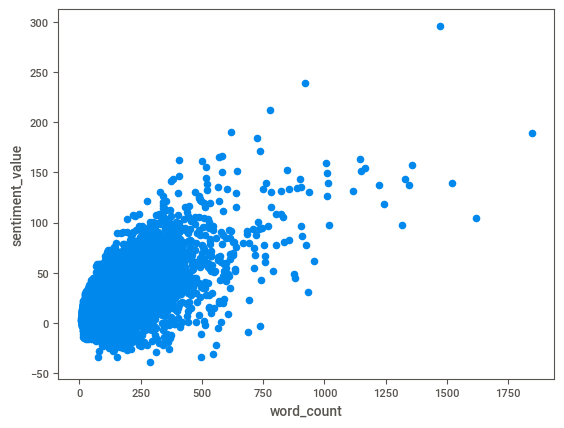

In [141]:
dfr.plot.scatter(x='word_count',y='sentiment_value')